In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colormaps
import matplotlib.cm as cm
import numpy as np
import folium
import plotly.express as px

In [2]:
df = pd.read_csv("afg_geocoded_imputed.csv")
df

,Semester,World region,Country,Administrative Division,Disease,Serotype/Subtype/Genotype,Animal Category,Species,Event_id,Measuring units,New outbreaks,Susceptible,Cases,Killed and disposed of,Deaths,Latitude,Longitude,Year
0,Jul-Dec 2009,Americas,United States of America,Indiana,Influenza A virus (Inf. with),-,Domestic,Swine,753,Animal,1.0,3000.0,1.0,0.0,0.0,40.327013,-86.174693,2009.0
1,Jul-Dec 2009,Americas,United States of America,Virginia,Influenza A virus (Inf. with),-,Domestic,Birds,773,Animal,1.0,3270.0,1.2,0.0,0.0,37.123224,-78.492772,2009.0
2,Jul-Dec 2009,Asia,China,Beijing,Influenza A virus (Inf. with),-,Domestic,Dogs,765,Animal,1.0,52.0,2.0,0.0,0.0,40.190632,116.412144,2009.0
3,Jul-Dec 2009,Asia,China,Heilongjiang,Influenza A virus (Inf. with),-,Domestic,Swine,765,Animal,1.0,60.0,4.0,0.0,0.0,48.000005,127.999992,2009.0
4,Jul-Dec 2009,Asia,Thailand,Saraburi,Influenza A virus (Inf. with),-,Domestic,Swine,786,Animal,1.0,680.0,34.0,0.0,0.0,14.624056,100.860102,2009.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,Jan-Jun 2025,Europe,Poland,Olszanica,Influenza A viruses of high pathogenicity (Inf...,H5N1,Domestic,Birds,4063,Animal,2.0,44.0,44.0,26.0,18.0,52.860002,23.085551,2025.0
1480,Jan-Jun 2025,Europe,Poland,Piecki,Influenza A viruses of high pathogenicity (Inf...,H5N1,Domestic,Birds,4063,Animal,1.0,18.0,18.0,4.0,14.0,53.749179,21.341220,2025.0
1481,Jan-Jun 2025,Europe,Poland,Puławy,Influenza A viruses of high pathogenicity (Inf...,H5N1,Wild,Mute Swan,4063,Animal,1.0,3.0,1.0,0.2,1.0,51.426260,21.985301,2025.0
1482,Jan-Jun 2025,Europe,Poland,Skępe,Influenza A viruses of high pathogenicity (Inf...,H5N1,Wild,Mute Swan,4063,Animal,1.0,4.8,2.0,0.2,2.0,52.867156,19.346520,2025.0


In [5]:
df['Serotype/Subtype/Genotype'] = df['Serotype/Subtype/Genotype'].replace("-", "unknown")
df['Serotype/Subtype/Genotype'] = df['Serotype/Subtype/Genotype'].replace("not typed", "unknown")

[Text(0.5, 80.7222222222222, 'Domestication Status'),
 Text(158.22222222222223, 0.5, 'Strain'),
 Text(0.5, 1.0, 'Cases Per Strain based on the Domestication Status of the Afflicted Animals')]

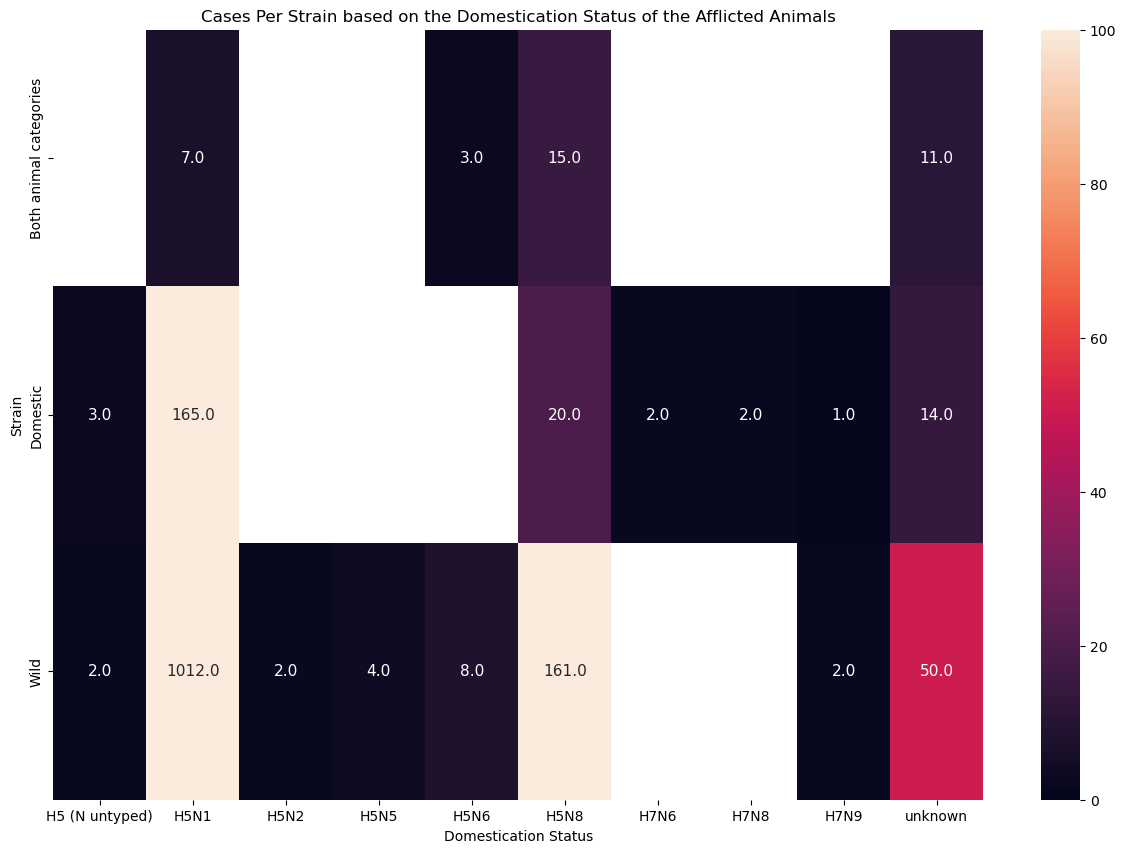

In [12]:
mini_df = df[['Animal Category', 'Serotype/Subtype/Genotype','Event_id']]
m = mini_df.groupby(['Animal Category', 'Serotype/Subtype/Genotype']).agg("count").reset_index()
#piv = pd.pivot_table(m, index = 'Serotype/Subtype/Genotype', columns = 'Animal Category', values= 'Event_id', fill_value = 0)
piv = pd.crosstab(df['Animal Category'], df['Serotype/Subtype/Genotype'], values = df['Event_id'], aggfunc = "count", dropna = True)

plt.figure(figsize=(15, 10))
a = sns.heatmap(piv, annot = True, fmt = '.1f', annot_kws={"size": 11}, vmin=0, vmax=100)
a.set(xlabel ="Domestication Status", ylabel = "Strain", title ='Cases Per Strain based on the Domestication Status of the Afflicted Animals')

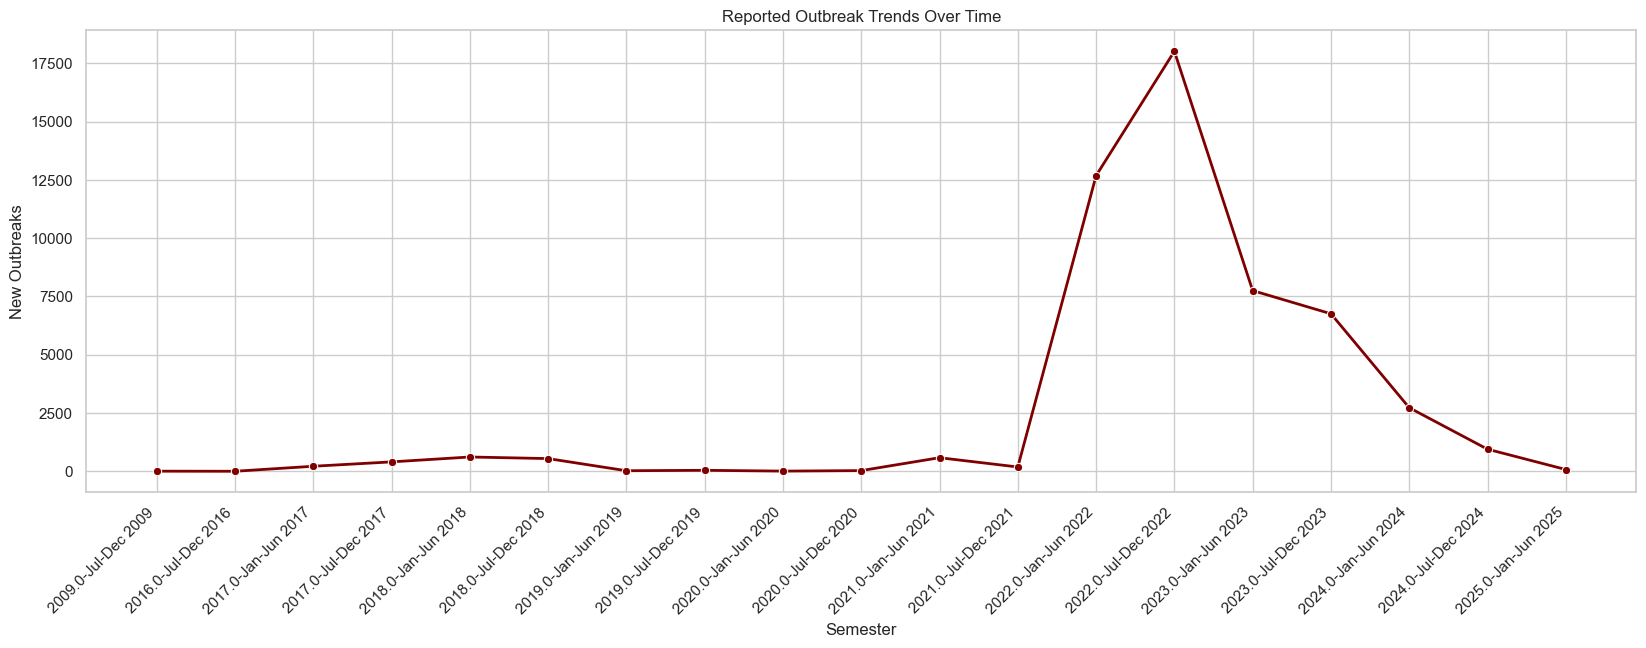

In [55]:
data = pd.read_csv('afg_geocoded_imputed.csv')

# Create a column for ordering: Combining Year and Semester
data['Time'] = data['Year'].astype(str) + "-" + data['Semester']

# Define semester order
semester_order = {'Jan-Jun': 1, 'Jul-Dec': 2}
data['SemesterOrder'] = data['Semester'].map(semester_order)

# Sort data by Year and Semester order
data = data.sort_values(by=['Year', 'SemesterOrder'])

# Aggregate new outbreaks per semester
agg_data = data.groupby('Time', as_index=False)['New outbreaks'].sum()

# Set plot style
sns.set_theme(style="whitegrid")

# Create line plot
plt.figure(figsize=(20, 6))
sns.lineplot(data=agg_data, x='Time', y='New outbreaks', marker='o', linewidth=2, color = 'maroon')

# Formatting the chart
plt.xticks(rotation=45, ha='right')
plt.xlabel("Semester")
plt.ylabel("New Outbreaks")
plt.title("Reported Outbreak Trends Over Time")
plt.grid(True)

# Show plot
plt.show()
     

In [17]:
# Create a map based on the number of cases in each country
m = folium.Map(location=[20, 0], zoom_start=2)

# Add markers for each outbreak
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=5,  # Adjust the size of the marker
        color='red',  # Color of the marker
        fill=True,
        fill_color='red',
        fill_opacity=0.5,
        popup=f"Country: {row['Country']}<br>Disease: {row['Disease']}<br>Cases: {row['Cases']}"
    ).add_to(m)

# Save the map to an HTML file
m.save('outbreaks_map.html')

# Display the map in a Jupyter Notebook (if using one)
m

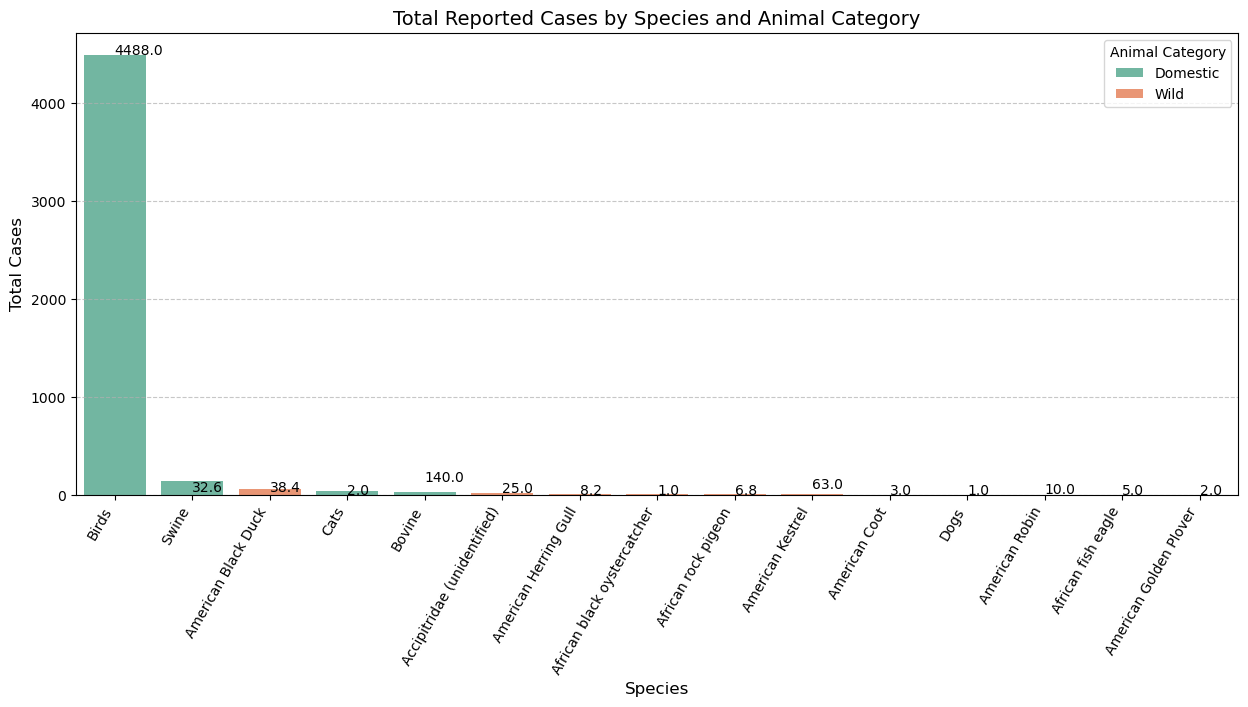

In [23]:
df = df[(df['Species'] != "Wildlife (species unspecified)") & (df['Species'] != "unknown")]
cases_per_species = df.groupby(['Animal Category', 'Species'])['Cases'].sum().reset_index().head(15)
cases_per_species = cases_per_species.sort_values(by='Cases', ascending=False)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

plt.figure(figsize=(15, 6))
sns.barplot(data=cases_per_species, x='Species', y='Cases', hue='Animal Category', palette='Set2')
addlabels(cases_per_species['Species'], cases_per_species['Cases'])
plt.xlabel("Species", fontsize=12)
plt.ylabel("Total Cases", fontsize=12)
plt.title("Total Reported Cases by Species and Animal Category", fontsize=14)
plt.xticks(rotation=60, ha='right', fontsize=10)
plt.legend(title="Animal Category", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()